#### Project Proposal

## How the Damaged Area Caused by Forest Fire Differs Based on different seasons

### Stat 201
##### Group 36 - Jenny Lee, Prithvi Sureka, Junhao Wen, Zimo Zhang

## Introduction

Past studies have shown that forest fires are an unavoidable natural phenomenon, and they're also increasingly dangerous as communities continue to spread away from urban areas. In 2018, nearly 60,000 fires burned parts of the continental United States. In November of that year alone, the fires killed more than 90 people and destroyed an estimated 14,000 homes and businesses (Linn, 2019). To prevent such detrimental consequences, it is necessary to understand the factors that are related to the degree of damage caused by forest fires.


##### Do different months affect the area of damage caused by forest fires?


One may ask if there is a relationship between the time of the year and the degree of damage inflicted by the forest fire. According to the data collected by the United States Environmental Protection Agency, from 1992 to 2015, the total acres burned by forest fires vary depending on different months of the year (Beckwith et al., 2018). 


To answer this question, we selected a forest fire data set from the Montesinho natural park, from the Tr´as-os-Montes northeast region of Portugal (P. Cortez & A. Morais, 2007). We will focus on the month of the year and the burned area (in ha). Among the months, we will use data for February and August as representative months for winter and summer, respectively, to compare the means of the damaged area between the two months. The metric we are interested in is: damage area - month.


## Preliminary Results

In [2]:
# Load package
library(tidyverse)
library(GGally)
library(infer)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
# Read in the forest fires data from https://archive.ics.uci.edu/ml/datasets/forest+fires 
forestfires_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

head(forestfires_data)

Rows: 517 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): month, day
dbl (11): X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


As indicated in the introduction, the forest fires occur differently depending on the time of the year, so we chose the two most months, February and August, as the representatives of winter and summer respectively.

In [5]:
# Clean and wangle the data set, drop the irrelevant rows and columns
# Since there is an outlier there, which rather affects our analysis, and then filter it out
forestfires <-forestfires_data |>
              filter(month %in% c("feb", "aug"), area < 400) |>
              select(month, area)
head(forestfires)

month,area
<chr>,<dbl>
aug,0
aug,0
aug,0
aug,0
aug,0
aug,0


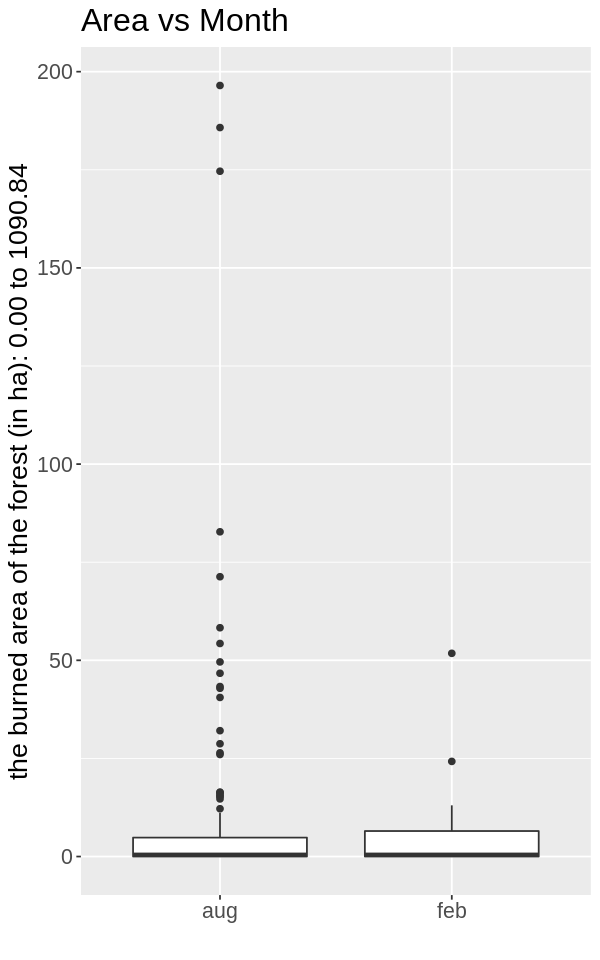

In [6]:
# Creat boxplot of all numeric variables
options(repr.plot.width = 5, repr.plot.height = 8)

area_month_plot <- forestfires|>
    ggplot(aes(y = area, x = month)) +
    geom_boxplot()+
    labs(x = "", y = "the burned area of the forest (in ha): 0.00 to 1090.84") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Area vs Month")

area_month_plot

We will keep the month as the explanatory variable, and the burned area as the response variable. 

Mean and standard deviation

In [9]:
# Calculate the mean and standard deviation of damage area
forestfires_summary <- forestfires %>% 
                       mutate(month = as.factor(month)) %>% 
                       summary()

forestfires_summary

 month          area        
 aug:183   Min.   :  0.000  
 feb: 20   1st Qu.:  0.000  
           Median :  0.540  
           Mean   :  8.262  
           3rd Qu.:  5.310  
           Max.   :196.480  

In [10]:
# Damage area
area_estimates<- forestfires %>%
           group_by(month) %>%
           summarize(mean = mean(area),sd = sd(area))
area_estimates

month,mean,sd
<chr>,<dbl>,<dbl>
aug,8.47929,26.25217
feb,6.27500,12.34251


In [11]:
# Creat the distribution plot of damage area
options(repr.plot.width = 10, repr.plot.height = 6)

area_dist <- forestfires|> 
    ggplot(aes(x = area, fill = month)) +
    geom_histogram(binwidth = 8, alpha = 0.4)+
    ggtitle("Distribution of Damage Area")+
    geom_vline(data = area_estimates, aes(xintercept = mean, color = month))

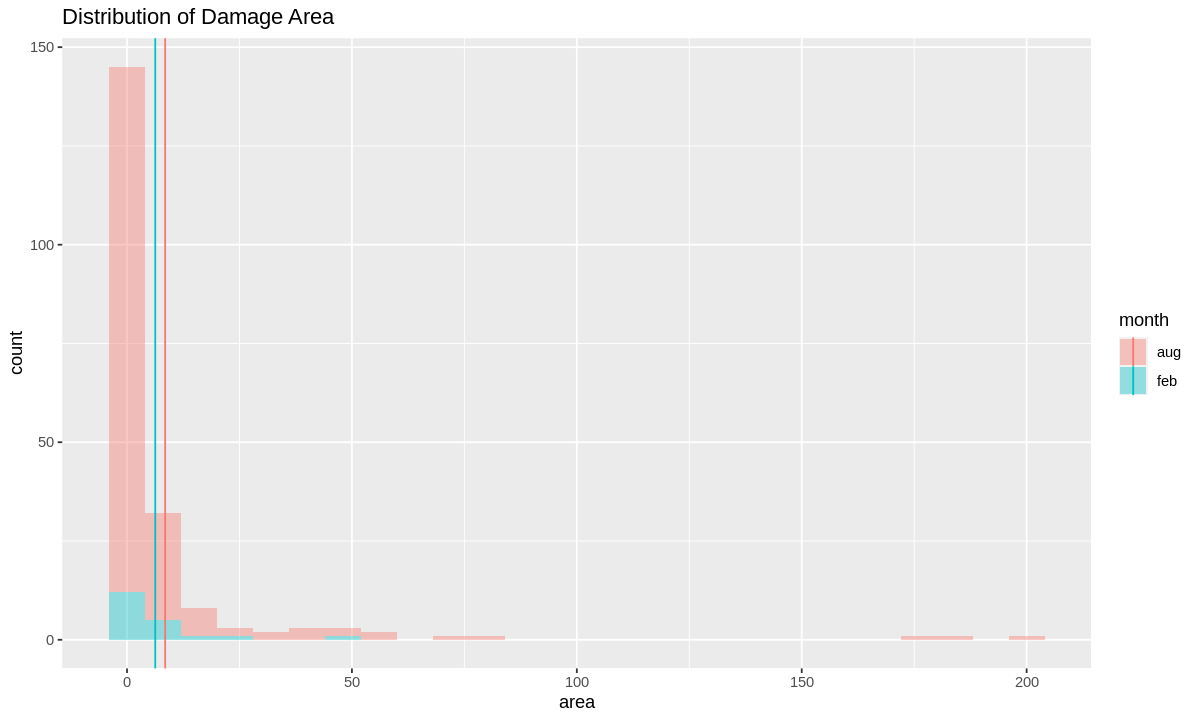

In [84]:
# Distribution of Damage Area
area_dist

## Methods: Plan

The good thing about this report is that it suggests the method for conducting the hypothesis testing. We know that the February and August samples are from two independent populations but the standard deviation is unknown. Hence, we may conduct hypothesis testing with a t-test.


According to the preliminary results, the mean damaged area caused by an individual forest fire case is observed to be higher in August compared to February by approximately 2.2 ha. However, to find out if the observed difference is statistically significant, we can conduct hypothesis testing at a 5% significance level.


The null hypothesis is that there is no difference between the mean damaged areas caused by the forest fires that occurred in February and August. 


##### H0: µ1 - µ2 = 0

##### HA: µ1 - µ2 ≠ 0



To conduct the hypothesis testing, we will find the test statistic and the p-value using R in the Jupyter notebook. We will then decide if the null hypothesis should be rejected.


Through this study, we can find if the forest fires yield different mean amounts of the damaged area in February and August. 


This finding may help people with understanding the approximate extensions of damaged areas caused by forest fires in different months of the year and making appropriate responses to potential fire incidents. In the future, we may ask if the conclusion of the study would have been different if the data were collected in countries other than Portugal. Also, we may ask what specific factors are related to the degree of damage caused by forest fires.


## References

Linn, R. (2019, November 1). Fluid Dynamics of wildfires. Physics Today. Retrieved March 17, 2023, from https://physicstoday.scitation.org/doi/10.1063/PT.3.4350?gclid=Cj0KCQjwn9CgBhDjARIsAD15h0A0B1JYckefhjcAkeP7sFKZJBrorMB9it32FvIJfdhSxxmx-HBuLKEaApt_EALw_wcB 
 
 
Beckwith, J., Hester, M., & Wolf, T. (2018, November). When and where are wildfires most common in the U.S.? The DataFace. Retrieved March 18, 2023, from https://thedataface.com/2018/11/public-health/wildfires-map#:~:text=June%20through%20August%20tends%20to,season%20in%20most%20years%20nationally. 


##### Data set:
P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimarães, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.

